# gensim

In [27]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath
from gensim.models import KeyedVectors

### load in pretrained word2vec model

In [4]:
word2vec = datapath('/Users/p.szymo/Documents/word_vectors/enwiki_20180420_100d.txt')
model = KeyedVectors.load_word2vec_format(word2vec)

##### word similarity 

In [6]:
model.most_similar('obama')

[('barack', 0.9786518812179565),
 ('ENTITY/Barack_Obama', 0.8945704698562622),
 ('biden', 0.810084342956543),
 ('ENTITY/Joe_Biden', 0.8024176359176636),
 ('trump', 0.7982811331748962),
 ('clinton', 0.7979164123535156),
 ('ENTITY/Hillary_Clinton', 0.7967318892478943),
 ('ENTITY/Michelle_Obama', 0.7866920828819275),
 ('ENTITY/Donald_Trump', 0.7821940183639526),
 ('hillary', 0.7757807970046997)]

In [7]:
model.most_similar('hilton')

[('marriott', 0.8348016738891602),
 ('ritz', 0.7800471782684326),
 ('wynfrey', 0.7631689310073853),
 ('sheraton', 0.7620010375976562),
 ('soreno', 0.7595160007476807),
 ('hyatt', 0.7538101077079773),
 ('westin', 0.7486691474914551),
 ('doubletree', 0.7433996796607971),
 ('surfcomber', 0.7387865781784058),
 ('crowne', 0.7363494038581848)]

In [10]:
model.most_similar('conspiracy')

[('conspiracies', 0.8399481177330017),
 ('crabchurch', 0.7791687250137329),
 ('extortion', 0.7708937525749207),
 ('complicity', 0.76999831199646),
 ('catilinian', 0.7659637928009033),
 ('conspiring', 0.7491363286972046),
 ('murder', 0.7414364218711853),
 ('bribery', 0.7290879487991333),
 ('alleged', 0.7282978296279907),
 ('collusion', 0.7241843342781067)]

In [11]:
model.most_similar('collusion')

[('complicity', 0.8374620079994202),
 ('colluding', 0.8190929293632507),
 ('dealings', 0.8104913234710693),
 ('colluded', 0.8091800808906555),
 ('alleged', 0.7940891981124878),
 ('bribery', 0.7885681390762329),
 ('connivance', 0.7784428596496582),
 ('accusations', 0.7738966941833496),
 ('disloyalty', 0.7734236121177673),
 ('malfeasance', 0.768873929977417)]

In [8]:
model.most_similar(negative='banana')

[('ENTITY/Scythris_inertella', 0.3487657904624939),
 ('ENTITY/Herrichia_excelsella', 0.3068707585334778),
 ('ENTITY/Peribatodes_perversaria', 0.2772373557090759),
 ('ENTITY/Phiaris_septentrionana', 0.2549286186695099),
 ('ENTITY/Acanthopsyche_ecksteini', 0.24981063604354858),
 ('ENTITY/Megalodes_eximia', 0.2447773814201355),
 ('ENTITY/Image:Honey_badger.jpg', 0.24383153021335602),
 ('ENTITY/Nola_chlamitulalis', 0.23774507641792297),
 ('ENTITY/Dichrorampha_gruneriana', 0.23250579833984375),
 ('ENTITY/Scythris_flaviventrella', 0.2278483510017395)]

In [12]:
model.most_similar(negative='trump')

[('ENTITY/Scythris_inertella', 0.27875423431396484),
 ('ENTITY/File:African_Buffalo_Drawing_historic.jpg', 0.2707037627696991),
 ('ENTITY/Image:Persian_Leopard_sitting.jpg', 0.2658817172050476),
 ('ENTITY/Leiningen-Emichsburg', 0.2638656198978424),
 ('ENTITY/Rileyiana_fovea', 0.2575606405735016),
 ('ENTITY/Janthinea_friwaldskii', 0.25661957263946533),
 ('ENTITY/Eublemma_pudorina', 0.2561008036136627),
 ('ENTITY/1981_in_spaceflight', 0.2546166181564331),
 ('ENTITY/File:Arkansas_Regions_Colored_With_Names.png', 0.24573861062526703),
 ('ENTITY/Nola_chlamitulalis', 0.24245761334896088)]

In [56]:
model.most_similar('trump')

[('ENTITY/Donald_Trump', 0.8110637664794922),
 ('obama', 0.798281192779541),
 ('barack', 0.7784837484359741),
 ('ENTITY/Donald_Trump_presidential_campaign,_2016', 0.7390224933624268),
 ('ENTITY/The_Trump_Organization', 0.732802152633667),
 ('ENTITY/Trump_Tower', 0.7313694953918457),
 ('ENTITY/File:ElectoralCollege2016.svg', 0.7147173881530762),
 ('ENTITY/File:President_Donald_Trump_receives_a_briefing_on_a_military_strike.jpg',
  0.7144560217857361),
 ('manafort', 0.714256763458252),
 ('gigicos', 0.7140686511993408)]

In [55]:
model.most_similar('mask')

[('masks', 0.8113056421279907),
 ('avohkii', 0.8100217580795288),
 ('skullpelt', 0.7746825218200684),
 ('kraahkan', 0.7664753198623657),
 ('gasmask', 0.7570312023162842),
 ('menpo', 0.7556092739105225),
 ('jukido', 0.7465859055519104),
 ('facepaint', 0.7463953495025635),
 ('orinasal', 0.7408226728439331),
 ('longcoat', 0.7399318218231201)]

In [62]:
result = model.most_similar(positive=['wheels', 'car'], negative=['four'])
print("{}: {:.4f}".format(*result[0]))

tires: 0.7322


### analogy

In [15]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result

In [16]:
analogy('japan', 'japanese', 'australia')

[('australian', 0.876969575881958),
 ('australians', 0.7480741143226624),
 ('ENTITY/English_Australians', 0.7214674949645996),
 ('tasmanian', 0.7200986742973328),
 ('nsw', 0.709411084651947),
 ('queensland', 0.6975623965263367),
 ('ENTITY/Culture_of_Australia', 0.6928346157073975),
 ('ENTITY/Australian_nationality_law', 0.6912353038787842),
 ('brataualung', 0.6911287903785706),
 ('ENTITY/Asian_Australians', 0.6887868642807007)]

In [17]:
analogy('australia', 'beer', 'france')

[('ENTITY/Marie_Brizard_et_Roger_International_', 0.704372227191925),
 ('cognac', 0.6980258226394653),
 ('ENTITY/Bosteels_Brewery#Pauwel_Kwak', 0.6938354969024658),
 ('ENTITY/Marie_Brizard_Wine_&_Spirits', 0.685952365398407),
 ("ENTITY/Brasserie_d'Achouffe", 0.6814519762992859),
 ('ENTITY/Bosteels_Brewery', 0.6809835433959961),
 ('alvinne', 0.6767335534095764),
 ('champagne', 0.6696678400039673),
 ('pommery', 0.6664804816246033),
 ('karlsbräu', 0.6664777398109436)]

In [18]:
analogy('obama', 'clinton', 'reagan')

[('nixon', 0.7800426483154297),
 ('kennedy', 0.7232027053833008),
 ('lyndon', 0.7140451669692993),
 ('cheney', 0.70884770154953),
 ('ENTITY/George_H._W._Bush', 0.7082054615020752),
 ('ENTITY/Gerald_Ford', 0.7006938457489014),
 ('eisenhower', 0.695790708065033),
 ('mondale', 0.6919281482696533),
 ('mcgovern', 0.6915150880813599),
 ('ENTITY/Ronald_Reagan', 0.6883499026298523)]

In [19]:
analogy('tall', 'tallest', 'long')

[('longest', 0.7013919353485107),
 ('shortest', 0.6812495589256287),
 ('busiest', 0.6250710487365723),
 ('skyjackings', 0.5888058543205261),
 ('southernmost', 0.5763955116271973),
 ('hkbcf', 0.5760782957077026),
 ('northernmost', 0.5751603841781616),
 ('ameralik', 0.573586642742157),
 ('largest', 0.5719391107559204),
 ('prior', 0.5631099343299866)]

In [20]:
analogy('particular', 'fussy', 'subservient')

[('timid', 0.6972248554229736),
 ('dimwitted', 0.6926876306533813),
 ('flighty', 0.6924856901168823),
 ('effete', 0.6862304210662842),
 ('slatternly', 0.6861974000930786),
 ('prissy', 0.6815040707588196),
 ('scatterbrained', 0.6811786890029907),
 ('henpecked', 0.6807010173797607),
 ('snobbish', 0.6806244850158691),
 ('pampered', 0.6768413782119751)]

In [23]:
analogy('cool', 'warm', 'water')

[('salinated', 0.7343252301216125),
 ('seawater', 0.7303400039672852),
 ('sublacustrine', 0.7096027731895447),
 ('potable', 0.707200288772583),
 ('nonpotable', 0.6999020576477051),
 ('riverwater', 0.6903719305992126),
 ('groundwater', 0.688728928565979),
 ('potability', 0.678020715713501),
 ('brackish', 0.6757316589355469),
 ('ponds', 0.6757315397262573)]

### which word doesnt belong

In [24]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


### pca of vector space

In [25]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

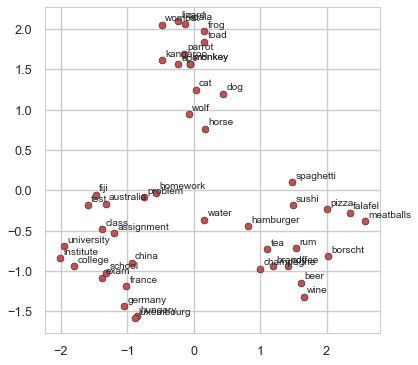

In [29]:
sns.set_style('whitegrid')
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

# spaCy

In [30]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 10.6 MB/s eta 0:00:01
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=6339bfcac04dc3915443a844b92c683636139bb0a1794127db33f99a864885d8
  Stored in directory: /private/var/folders/3b/6q0d93qn66g5fg2t3938zdb40000gn/T/pip-ephem-wheel-cache-xr3wsotw/wheels/91/dd/30/01b00272fbb8fbcdafcac24f3c7d362ce2d8ba296071b41d99
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [31]:
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm

In [32]:
tqdm.pandas()

In [33]:
df = pd.read_csv("yelp.csv")

In [34]:
df.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [35]:
df.shape

(10000, 10)

## spaCy Pipeline

In [36]:
nlp = spacy.load('en_core_web_md')

In [37]:
df['spacy'] = df.text.progress_apply(lambda x: nlp(x))

100%|██████████| 10000/10000 [03:55<00:00, 42.50it/s]


#### each document in the corpus is a doc object containing individual token objects

In [40]:
df['spacy'].head()

0    (My, wife, took, me, here, on, my, birthday, f...
1    (I, have, no, idea, why, some, people, give, b...
2    (love, the, gyro, plate, ., Rice, is, so, good...
3    (Rosie, ,, Dakota, ,, and, I, LOVE, Chaparral,...
4    (General, Manager, Scott, Petello, is, a, good...
Name: spacy, dtype: object

In [42]:
df.loc[0,'spacy']

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!

In [43]:
type(df.loc[0,'spacy'])

spacy.tokens.doc.Doc

In [44]:
type(df.loc[0,'spacy'][0])

spacy.tokens.token.Token

In [45]:
doc = df.spacy[0]

In [46]:
#weod is me
doc[3].is_stop

True

#### part of speech tagging

In [47]:
doc[3].pos_

'PRON'

#### vector from loaded language model

In [48]:
#stop words HAVE a vector representation
doc[3].vector

array([-1.5396e-01,  3.1894e-01, -5.4888e-01,  2.5575e-01,  2.5812e-01,
       -2.4498e-01, -7.5256e-03, -4.4586e-01, -3.3310e-01,  2.5371e+00,
       -3.0797e-01,  3.2259e-01,  1.5141e-01, -4.6900e-01, -2.9880e-01,
       -6.7120e-03, -1.5408e-01,  8.2595e-01, -9.0429e-02,  9.5433e-02,
        3.7679e-01,  2.3810e-02, -2.3350e-01,  2.6510e-01, -1.0142e-01,
        1.3369e-02,  1.8771e-01, -3.0711e-02,  3.5253e-01, -5.2993e-01,
        3.2665e-02,  4.6994e-01, -2.9181e-01, -5.3454e-02,  1.5640e-02,
       -3.5972e-02, -2.5803e-02,  2.7286e-02, -6.6553e-02, -3.7466e-01,
       -3.1585e-01, -4.4513e-02, -3.1270e-01, -1.3976e-01,  2.2966e-01,
        3.9333e-01, -1.7182e-01, -4.3639e-02,  1.7291e-01,  2.0719e-01,
       -9.2617e-02,  1.8868e-01,  9.6837e-02,  2.3362e-02,  1.5004e-01,
        3.0582e-01, -4.4929e-01, -8.3601e-02, -3.8335e-02, -4.1140e-02,
       -3.7771e-01, -8.7132e-02, -2.4334e-01,  1.9499e-01,  3.4166e-01,
       -1.4412e-01,  3.7503e-02, -5.1979e-02, -1.1018e-01,  4.08

#### vector representation of document (avg of all word vectors in doc)

In [49]:
doc.vector_norm

3.2036364011442964

#### sentence splitting in document

In [50]:
[sents for sents in doc.sents]

[My wife took me here on my birthday for breakfast and it was excellent.  ,
 The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  ,
 Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  ,
 It looked like the place fills up pretty quickly,
 so the earlier you get here the better.
 ,
 Do yourself a favor and get their Bloody Mary.  ,
 It was phenomenal and simply the best I've ever had.  ,
 I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  ,
 It was amazing.
 ,
 While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet,
 and it was tasty and delicious.  ,
 It came with 2 pieces of their griddled bread with was amazing,
 and it absolutely made the meal complete.  ,
 It was the best "toast" I've ever had.
 ,
 Anyway, I can't wait to go back!]

#### document similarity

In [51]:
doc_2 = df.spacy[1]
doc.similarity(doc_2)

0.9821755280885994

In [52]:
doc

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!

### see documentation for all you can do
* https://spacy.io/api/token
* https://spacy.io/api/doc

In [53]:
df_vec = pd.DataFrame(np.vstack([x.vector for x in df.spacy]))
df_vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.021647,0.138191,-0.106211,-0.078064,0.056181,0.060862,-0.003805,-0.112674,-0.033807,2.101514,...,-0.136959,0.051397,0.018642,-0.023069,0.023127,-0.044228,0.049466,-0.054665,0.042870,0.086430
1,-0.051446,0.174888,-0.162487,-0.085476,0.075221,0.077776,0.023618,-0.094539,0.011515,2.291694,...,-0.185593,0.048113,-0.003736,-0.029323,0.014807,-0.067929,-0.012392,-0.065273,0.063565,0.102081
2,0.017356,0.126895,-0.039717,-0.133329,0.094522,0.094641,0.031455,-0.209612,-0.031536,1.723231,...,-0.226321,0.145408,-0.109102,-0.080141,0.077363,-0.122503,0.094507,-0.145394,0.001237,0.178629
3,0.060860,0.164606,-0.154045,-0.168020,0.138500,0.092502,-0.002123,-0.076254,-0.074994,1.953031,...,-0.180692,-0.032520,0.012061,-0.062361,-0.013487,0.018939,0.078037,-0.067532,-0.028504,0.090960
4,-0.095067,0.196053,-0.222208,-0.049087,0.052358,-0.010961,0.008600,-0.170744,-0.042944,2.149826,...,-0.194802,0.040638,-0.044806,-0.043795,0.094823,-0.067053,-0.022288,-0.071459,0.071956,0.073355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.075224,0.134890,-0.089058,-0.109522,0.056692,0.149972,-0.031459,-0.069323,-0.004701,1.914595,...,-0.112275,0.041639,-0.041451,-0.033929,-0.055093,-0.020203,0.021392,-0.192331,0.043283,0.105996
9996,-0.021209,0.151835,-0.112525,-0.122594,0.096538,0.058507,0.037832,-0.138415,-0.004357,2.119311,...,-0.134819,0.032786,-0.051842,-0.048212,0.020107,-0.043680,0.014316,-0.068673,0.009537,0.125834
9997,-0.030904,0.165316,-0.102100,-0.127558,0.130750,0.056111,0.000408,-0.088597,0.021815,2.139497,...,-0.178942,0.070853,-0.077041,-0.035782,-0.026700,-0.029504,0.013137,-0.100683,0.024946,0.108802
9998,-0.026898,0.144509,-0.164131,-0.081958,0.082170,-0.037320,0.030681,-0.165972,-0.023817,2.318492,...,-0.177542,-0.039687,0.011728,-0.033147,0.080831,-0.011535,-0.033406,-0.053590,0.045518,0.094528
